PROBLEM 1: CLASSIFY WHETHER THE EMPLOEE BUY HEALTH INSURANCE OR NOT USING LOGISTIC MODEL

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("insurance_data.csv")
data

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


For this classification we can go with LOGISTIC REGRESSION MODEL instead of Linear model

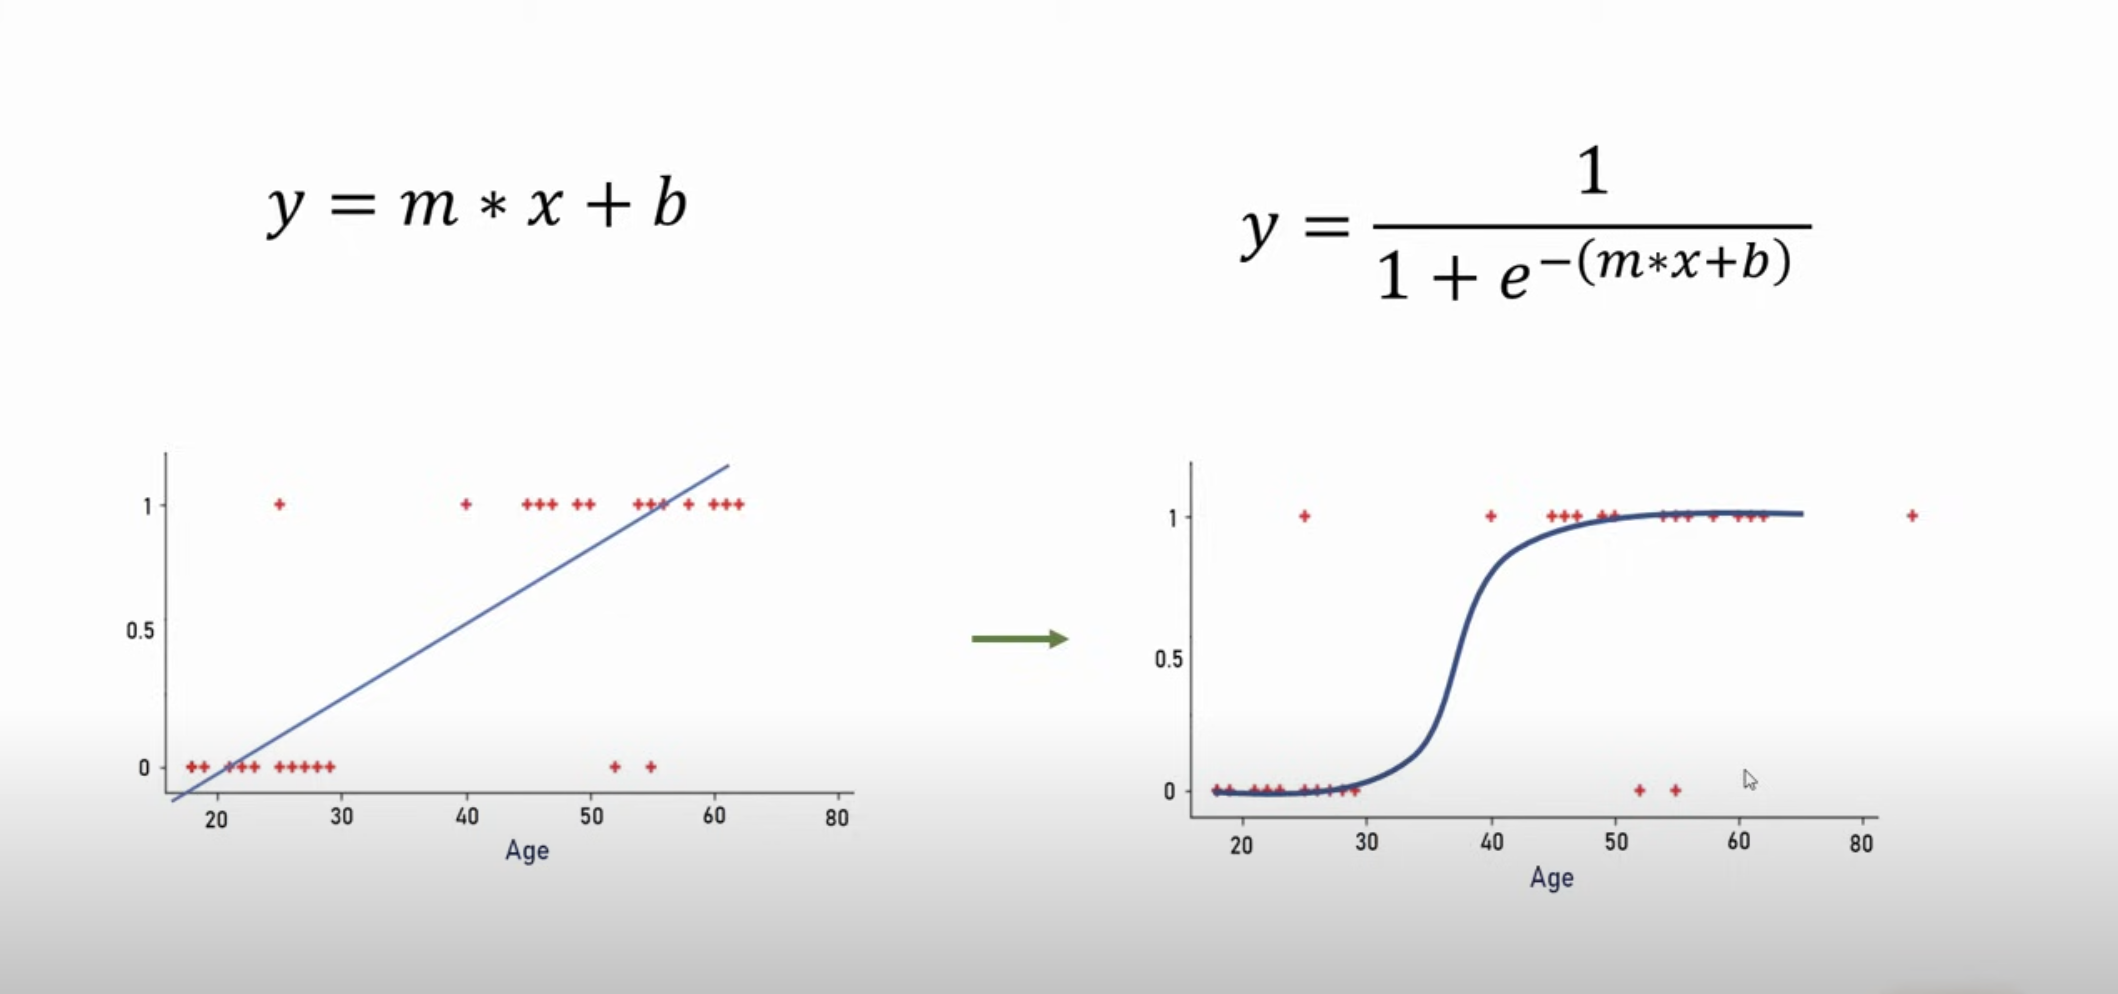

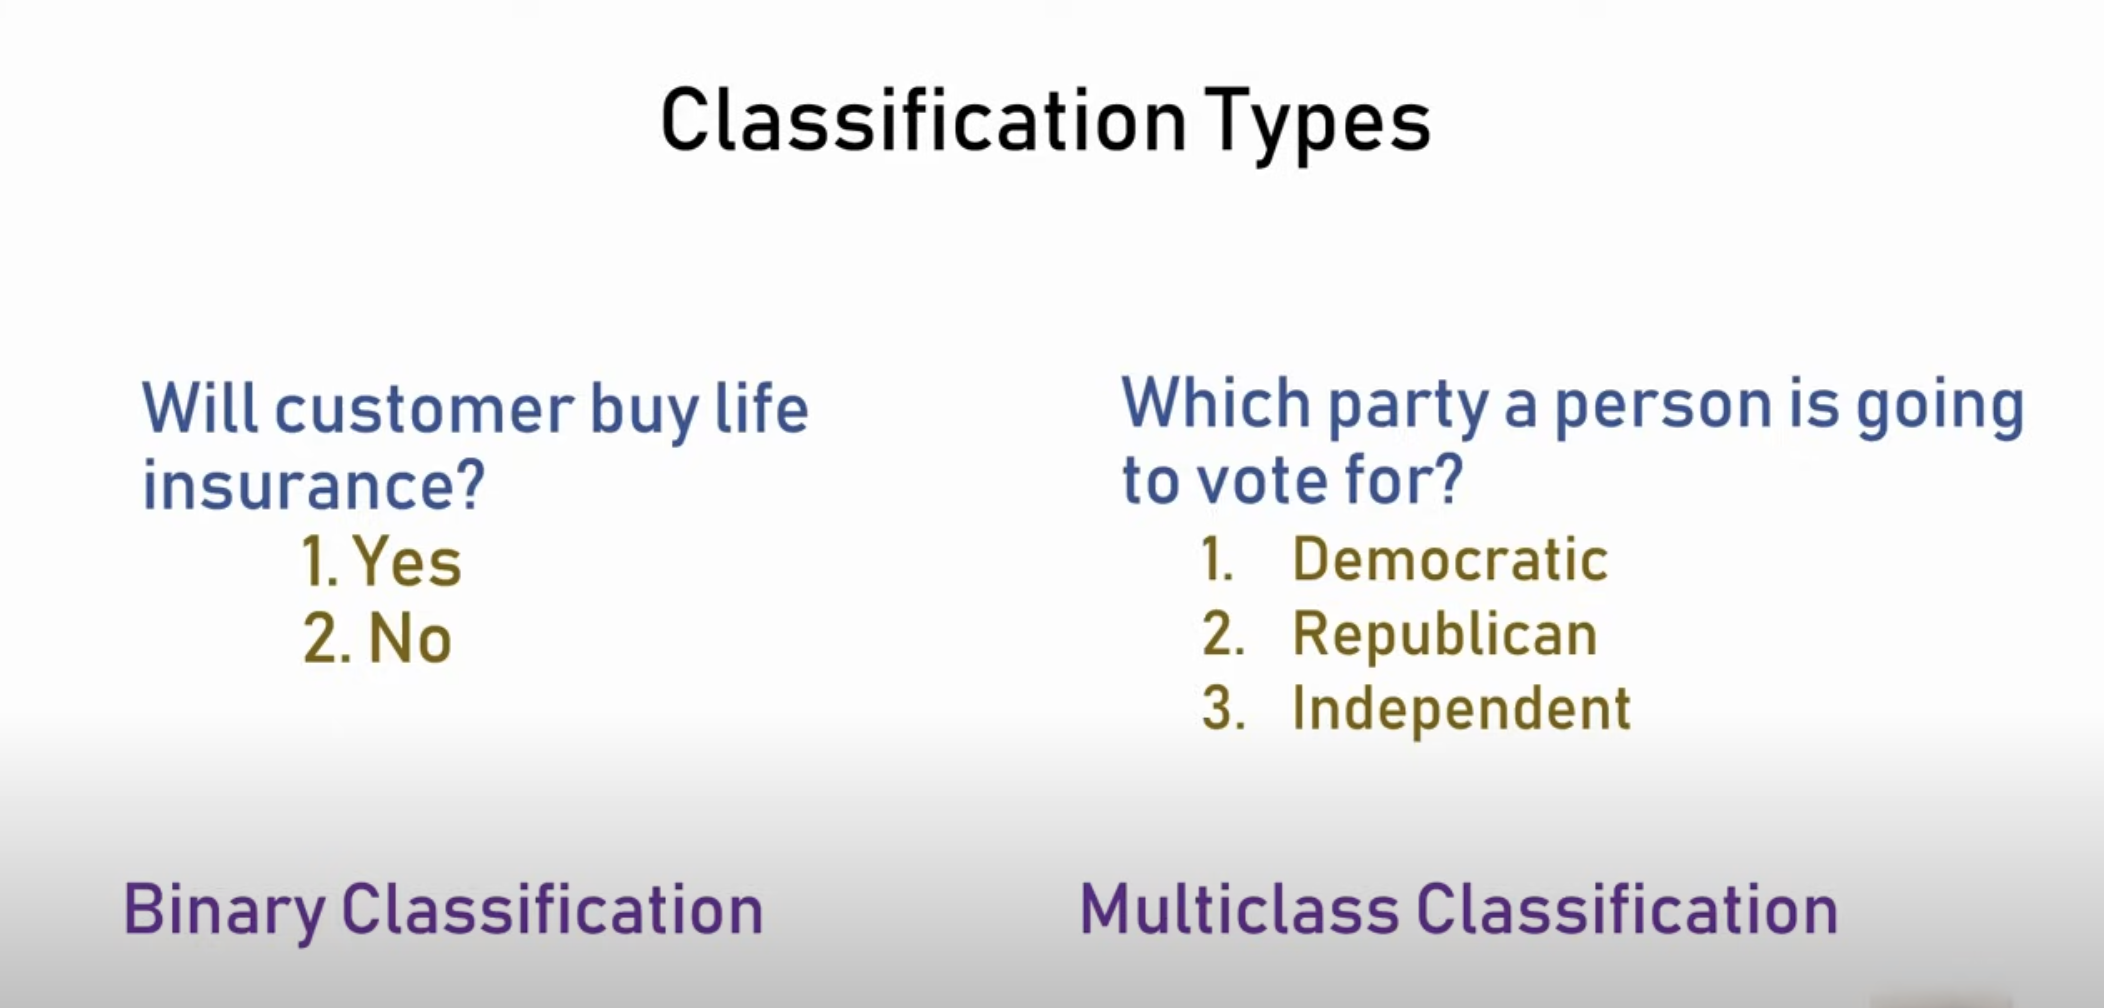

In [3]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


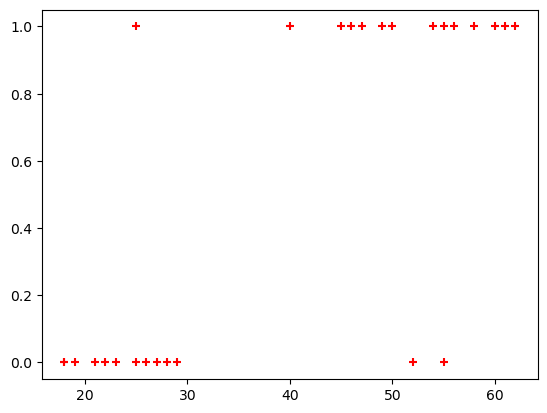

In [5]:
plt.scatter(data.age,data.bought_insurance,marker='+',color="red")

Now let's split the out dataset

In [6]:
data.shape

(27, 2)

In [7]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data[['age']],data.bought_insurance,test_size=0.1)

In [20]:
X_test

,age
16,25
15,55
5,56


In [21]:
X_train

,age
26,23
17,58
9,61
24,50
10,18
13,29
20,21
6,55
18,19
3,52


In [23]:
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train) #we are taining our model

LogisticRegression()

In [26]:
X_test

,age
16,25
15,55
5,56


In [30]:
model.predict(X_test) # here age 25 won't buy Insurance so it is "0" but age=55 and 56 are willing to buy Insurance that is why we got "1". 

array([0, 1, 1])

In [31]:
X_train

,age
26,23
17,58
9,61
24,50
10,18
13,29
20,21
6,55
18,19
3,52


In [32]:
model.predict(X_train)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1])

In [40]:
y_predicted = model.predict(X_test)

In [41]:
model.predict_proba(X_test)

array([[0.94196743, 0.05803257],
       [0.10105901, 0.89894099],
       [0.08696551, 0.91303449]])

In [42]:
model.score(X_test,y_test)

0.6666666666666666

In [43]:
y_predicted

array([0, 1, 1])

In [44]:
X_test

,age
16,25
15,55
5,56


model.coef_ indicates value of m in y=m*x + b equation

In [45]:
model.coef_

array([[0.1657493]])

model.intercept_ indicates value of b in y=m*x + b equation

In [46]:
model.intercept_

array([-6.93069893])

Lets defined sigmoid function now and do the math with hand

In [47]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [48]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [50]:
age = 35
prediction_function(age) #0.485 is less than 0.5 which means person with 35 age will not buy insurance i.e 0.48<0.5

0.4850044983805899

In [55]:
age = 43
prediction_function(age) #0.485 is more than 0.5 which means person with 43 will buy the insurance i.e 0.56>0.5

0.568565299077705

In [54]:
age = 100
prediction_function(age) # 0.93>0.5 so person will buy Insurance 

0.9352330313932145

Here the age: 55 will buy insurance i.e 1

age: 28 will not buy Insurance i.e 0

age: 50 will buy insurance i.e 1

age: 26 will not buy Insurance i.e 0

age: 23 will not buy Insurance i.e 0

age: 40 will buy insurance i.e 1

Finally high age people are intresting to buy insurance with age 55, 50 and 40 

In [58]:
model.score(X_test,y_test) # here we got 66% score that means our model is 66% is average

0.6666666666666666

In [37]:
model.predict_proba(X_test)

array([[0.94196743, 0.05803257],
       [0.10105901, 0.89894099],
       [0.08696551, 0.91303449]])